In [65]:
import pandas as pd

df = pd.read_csv("steam_games_dataset_kaggle.csv")

#
df= df[["name","genre","popular_tags"]]


df = pd.DataFrame(df.dropna())

df = df.head(3000)

unique_genres = set([genre for genres in df['genre'] for genre in genres.split(',')])


for genre in unique_genres:
    df[genre] = df['genre'].apply(lambda x: int(genre in x))

# Print the updated dataset
df.head()

,name,genre,popular_tags,Utilities,Video Production,Animation & Modeling,Web Publishing,Racing,RPG,Early Access,...,Game Development,Simulation,Massively Multiplayer,Sports,Free to Play,Audio Production,Adventure,Valve,Strategy,Software Training
0,DOOM,Action,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Action,Adventure,Massively Multiplayer","Survival,Shooter,Multiplayer,Battle Royale,PvP...",0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,BATTLETECH,"Action,Adventure,Strategy","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,DayZ,"Action,Adventure,Massively Multiplayer","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [66]:
genre_counts_dict = {}
for genre in unique_genres:
    genre_counts_dict[genre] = df['genre'].apply(lambda x: genre in x).sum()

sorted_genres = sorted(genre_counts_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the 10 most popular genres
top_10_genres = sorted_genres[:10]
for genre, count in top_10_genres:
    print(genre, count)

Indie 1509
Action 1388
Adventure 1064
Simulation 770
Strategy 764
RPG 727
Casual 474
Early Access 372
Free to Play 192
Massively Multiplayer 170


In [67]:
unique_genres = set([genre for genres in df['popular_tags'] for genre in genres.split(',')])

for genre in unique_genres:
    df[genre] = df['popular_tags'].apply(lambda x: int(genre in x))

for genre in unique_genres:
    genre_counts_dict[genre] = df['popular_tags'].apply(lambda x: genre in x).sum()

sorted_genres = sorted(genre_counts_dict.items(), key=lambda x: x[1], reverse=True)

# Printing the 10 most popular tags
top_10_genres = sorted_genres[:10]
for genre, count in top_10_genres:
    print(genre, count)

/tmp/ipykernel_3033/3705540305.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[genre] = df['popular_tags'].apply(lambda x: int(genre in x))
/tmp/ipykernel_3033/3705540305.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[genre] = df['popular_tags'].apply(lambda x: int(genre in x))
/tmp/ipykernel_3033/3705540305.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

Singleplayer 2014
Action 1736
Indie 1652
Adventure 1601
Multiplayer 1297
Soundtrack 1055
Great Soundtrack 1052
Strategy 1004
Simulation 952
RPG 917


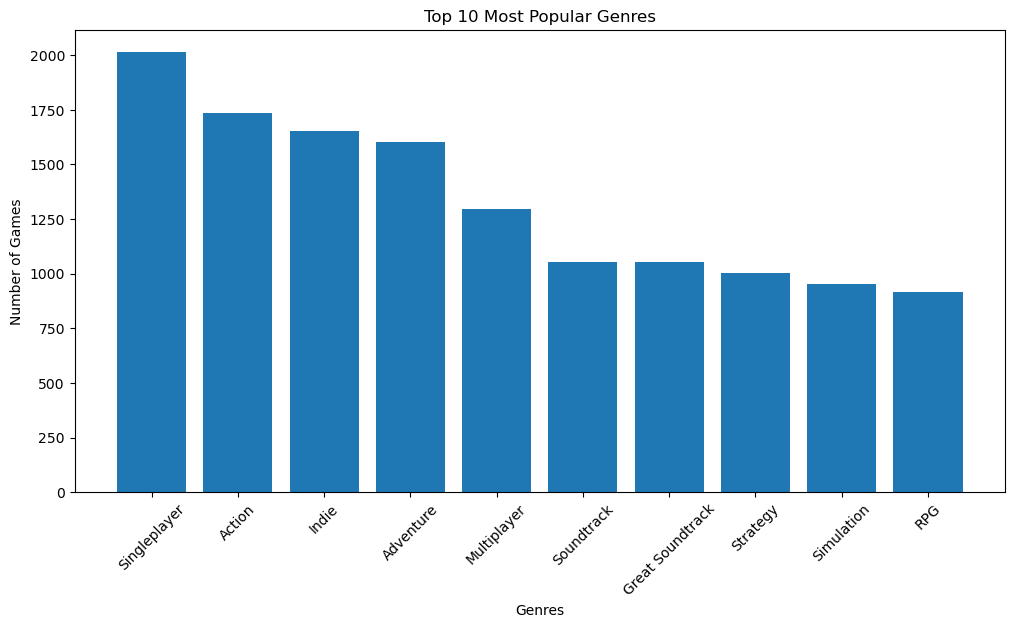

In [68]:
import matplotlib.pyplot as plt
genres = [genre for genre, count in top_10_genres]
counts = [count for genre, count in top_10_genres]

# Printing the top 10 genre separated by commas
plt.figure(figsize=(12, 6))
plt.bar(genres, counts)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

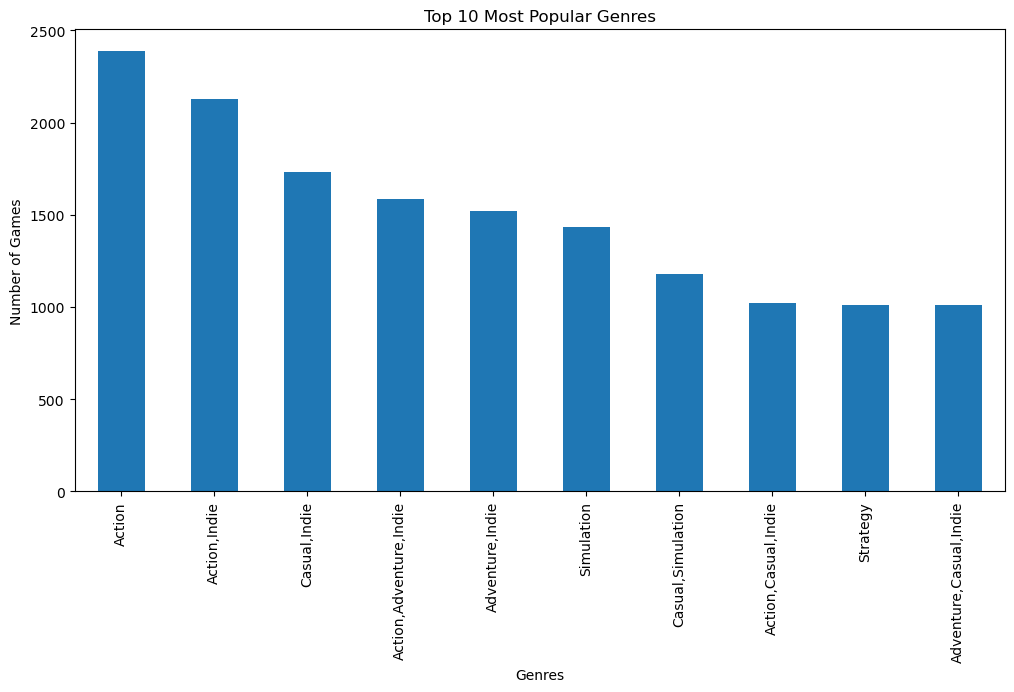

In [69]:
df = pd.read_csv("steam_games_dataset_kaggle.csv")

genre_counts = df['genre'].value_counts()

popular_genres = genre_counts.sort_values(ascending=False)

# Printing the top 10 genres not separated by commas

plt.figure(figsize=(12, 6))
popular_genres[:10].plot(kind='bar')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Games')
plt.show()

In [70]:
df = pd.read_csv("steam_games_dataset_kaggle.csv")

df = df[["name","release_date","genre","popular_tags"]]
df = pd.DataFrame(df.dropna())

df = df.head(3000)
df.head(10)

,name,release_date,genre,popular_tags
0,DOOM,"May 12, 2016",Action,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017","Action,Adventure,Massively Multiplayer","Survival,Shooter,Multiplayer,Battle Royale,PvP..."
2,BATTLETECH,"Apr 24, 2018","Action,Adventure,Strategy","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S..."
3,DayZ,"Dec 13, 2018","Action,Adventure,Massively Multiplayer","Survival,Zombies,Open World,Multiplayer,PvP,Ma..."
4,EVE Online,"May 6, 2003","Action,Free to Play,Massively Multiplayer,RPG,...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO..."
6,Devil May Cry 5,"Mar 7, 2019",Action,"Action,Hack and Slash,Great Soundtrack,Demons,..."
7,Human: Fall Flat,"Jul 22, 2016","Adventure,Indie","Funny,Multiplayer,Co-op,Puzzle,Physics,Local C..."
8,They Are Billions,"Dec 12, 2017","Strategy,Early Access","Early Access,Base Building,Strategy,Zombies,Su..."
9,Warhammer: Chaosbane,"May 31, 2019","Action,Adventure,RPG","RPG,Adventure,Hack and Slash,Action,Action RPG..."
10,For The King,"Apr 19, 2018","Adventure,Indie,RPG,Strategy","RPG,Turn-Based Combat,Adventure,Online Co-Op,C..."


In [71]:
# get me the newest games by the last 4 digits of the release date
df['release_date'] = df['release_date'].astype(str).str[-4:]
df = df[df['release_date'] != 'TBA']
df = df[df['release_date'] != '2020']

df = df.sort_values(by='release_date', ascending=False)
df.head(30)


,name,release_date,genre,popular_tags
729,BIGFOOT,2019,"Adventure,Indie,Early Access","Early Access,Multiplayer,Survival Horror,Horro..."
2442,Irony Curtain: From Matryoshka with Love,2019,"Adventure,Indie","Adventure,Indie,Satire,Point & Click,Singlepla..."
705,ISLANDERS,2019,"Casual,Indie,Strategy","Relaxing,Strategy,City Builder,Indie,Building,..."
707,Factory Town,2019,"Simulation,Strategy,Early Access","Early Access,City Builder,Strategy,Simulation,..."
708,Splitgate: Arena Warfare,2019,"Action,Free to Play","Free to Play,FPS,Arena Shooter,Multiplayer,Sho..."
715,Yakuza Kiwami 2,2019,"Action,Adventure,RPG","Action,Story Rich,Beat 'em up,RPG,Violent,Sing..."
2445,Evospace,2019,"Adventure,Indie,Simulation,Early Access","Early Access,Early Access,Simulation,Adventure..."
720,KARDS,2019,"Free to Play,Indie,Strategy,Early Access","Early Access,Card Game,World War II,Free to Pl..."
724,嗜血印 Bloody Spell,2019,"Action,Adventure,Indie,RPG,Early Access","Early Access,Action,Early Access,Indie,RPG,Nud..."
2438,Winter Fury: The Longest Road,2019,"Action,Indie,Early Access","Early Access,Early Access,Action,Indie,VR"


In [72]:
# get the oldest games by the last 4 digits of the release date
df = df.sort_values(by='release_date', ascending=True)
df.head(30)

,name,release_date,genre,popular_tags
2096,Dragon's Lair,1983,"Action,Adventure,Casual","Adventure,Action,FMV,Quick-Time Events,Arcade,..."
2554,Police Quest™ Collection,1987,Adventure,"Adventure,Point & Click,Classic,Pixel Graphics..."
2273,Quest for Glory 1-5,1989,Adventure,"Adventure,1990's,1980s,RPG,Classic,Fantasy,Poi..."
912,Commander Keen,1990,Action,"Platformer,Classic,1990's,2D,Action,Retro,Old ..."
1790,Indiana Jones® and the Fate of Atlantis™,1992,Adventure,"Adventure,Point & Click,Classic,Masterpiece,Si..."
2585,Fatty Bear's Birthday Surprise,1993,"Adventure,Casual","Point & Click,Casual,Adventure,Family Friendly..."
2583,Putt-Putt® Goes to the Moon,1993,"Adventure,Casual","Adventure,Casual,Point & Click,Family Friendly..."
2978,X-COM: UFO Defense,1993,Strategy,"Strategy,Classic,Turn-Based Strategy,Sci-fi,Tu..."
868,DOOM II,1994,Action,"Classic,FPS,Action,1990's,Shooter,Retro,Demons..."
2805,Tex Murphy: Under a Killing Moon,1994,Adventure,"Adventure,FMV,Noir,Point & Click,Detective,Cla..."


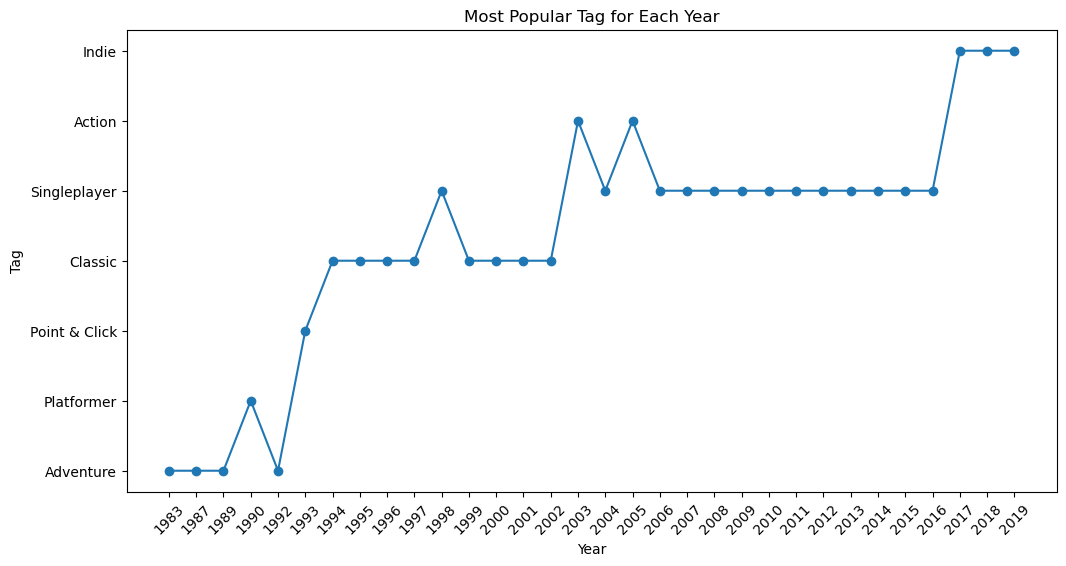

In [73]:
tag_counts_per_year = {}

for index, row in df.iterrows():
    year = row['release_date']
    tags = row['popular_tags'].split(',')
    for tag in tags:
        tag = tag.strip()  # Remove leading/trailing whitespaces
        if year not in tag_counts_per_year:
            tag_counts_per_year[year] = {}
        if tag not in tag_counts_per_year[year]:
            tag_counts_per_year[year][tag] = 0
        tag_counts_per_year[year][tag] += 1

# Sorting the years in ascending order
years = sorted(tag_counts_per_year.keys())

# Finding the most popular tag for each year
most_popular_tags = []
for year in years:
    tags = tag_counts_per_year[year]
    sorted_tags = sorted(tags.items(), key=lambda x: x[1], reverse=True)
    most_popular_tag = sorted_tags[0][0] if sorted_tags else None
    most_popular_tags.append(most_popular_tag)

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(years, most_popular_tags, marker='o')
plt.title('Most Popular Tag for Each Year')
plt.xlabel('Year')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()

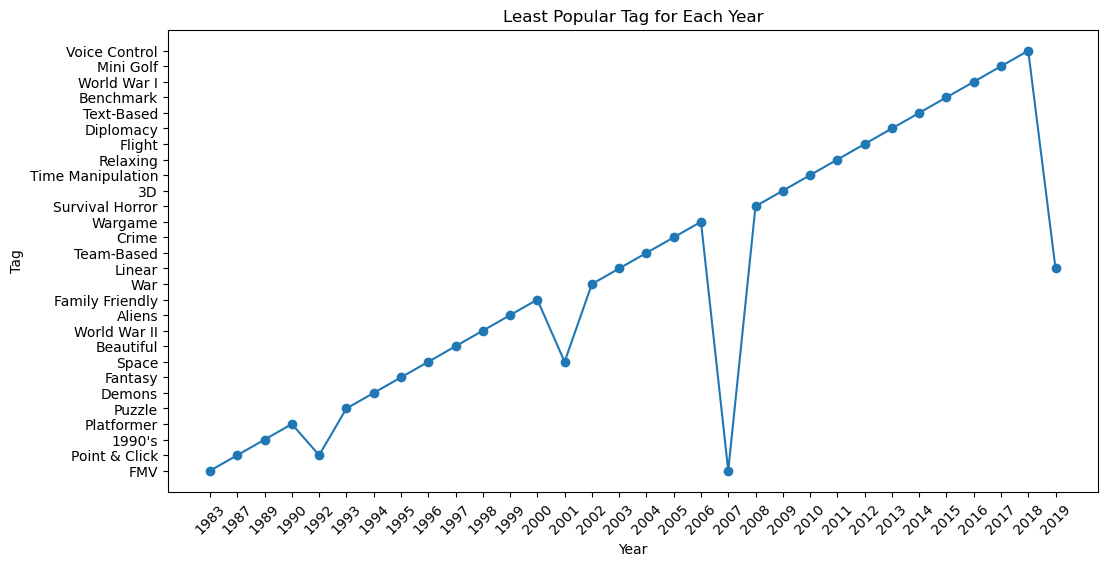

In [76]:
least_popular_tags = []
for year in years:
    tags = tag_counts_per_year[year]
    sorted_tags = sorted(tags.items(), key=lambda x: x[1])
    least_popular_tag = sorted_tags[0][0] if sorted_tags else None
    least_popular_tags.append(least_popular_tag)

plt.figure(figsize=(12, 6))
plt.plot(years, least_popular_tags, marker='o')
plt.title('Least Popular Tag for Each Year')
plt.xlabel('Year')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()

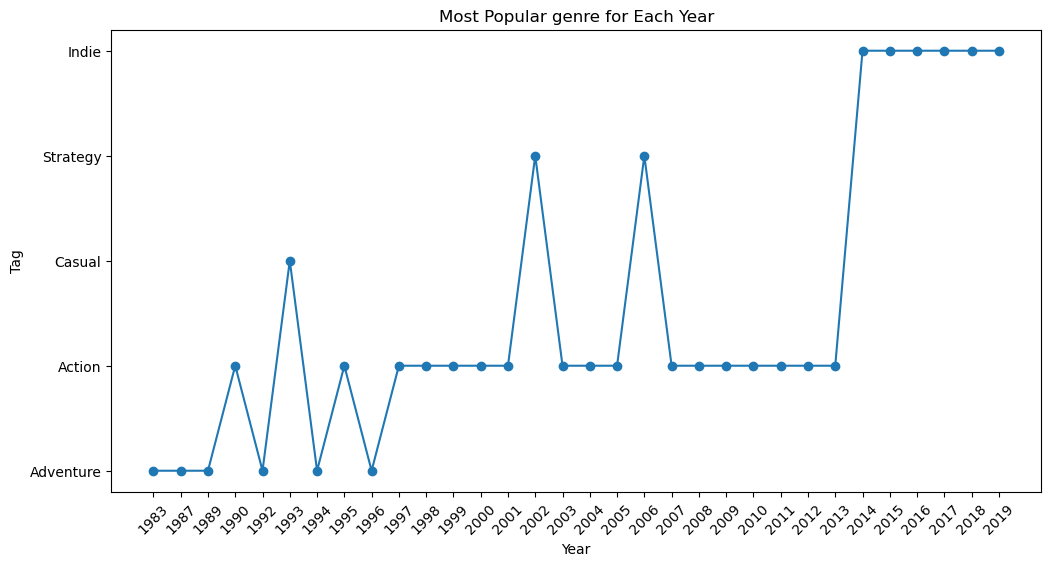

In [75]:
for index, row in df.iterrows():
    year = row['release_date']
    genre = row['genre'].split(',')
    for tag in genre:
        tag = tag.strip()  # Remove leading/trailing whitespaces
        if year not in tag_counts_per_year:
            tag_counts_per_year[year] = {}
        if tag not in tag_counts_per_year[year]:
            tag_counts_per_year[year][tag] = 0
        tag_counts_per_year[year][tag] += 1

# Sorting the years in ascending order
years = sorted(tag_counts_per_year.keys())

# Finding the most popular tag for each year
most_popular_tags = []
for year in years:
    tags = tag_counts_per_year[year]
    sorted_tags = sorted(tags.items(), key=lambda x: x[1], reverse=True)
    most_popular_tag = sorted_tags[0][0] if sorted_tags else None
    most_popular_tags.append(most_popular_tag)

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(years, most_popular_tags, marker='o')
plt.title('Most Popular genre for Each Year')
plt.xlabel('Year')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()

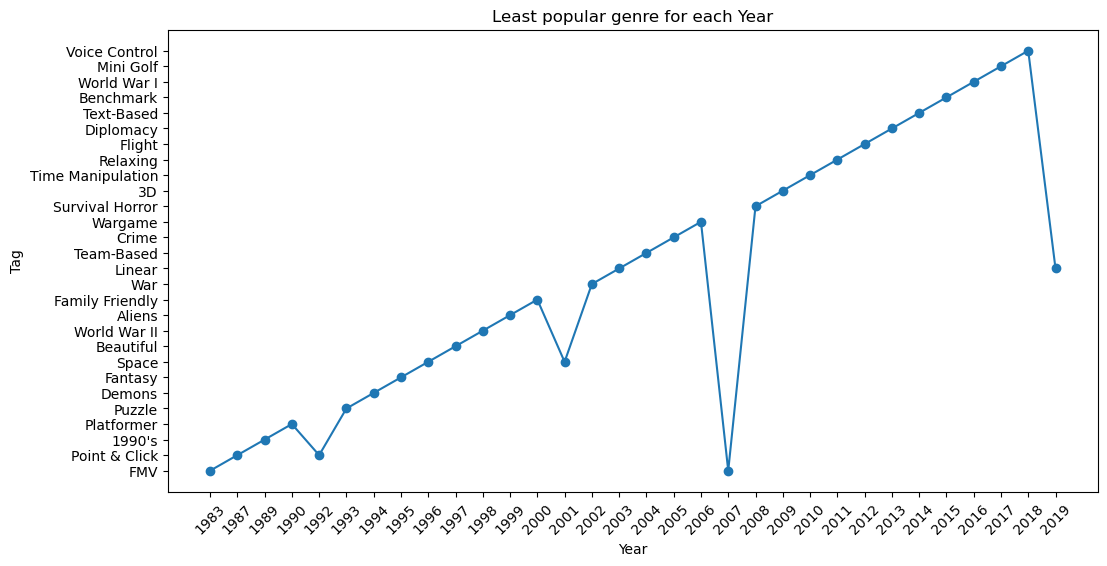

In [82]:
most_popular_tags = []
for year in years:
    tags = tag_counts_per_year[year]
    sorted_tags = sorted(tags.items(), key=lambda x: x[1], reverse=True)
    most_popular_tag = sorted_tags[0][0] if sorted_tags else None
    most_popular_tags.append(most_popular_tag)

plt.figure(figsize=(12, 6))
plt.plot(years, least_popular_tags, marker='o')
plt.title('Least popular genre for each Year')
plt.xlabel('Year')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()